# Library import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')

# Dataset overview


Cardiovaskular disease (CVDs) is the number 1 cause of death globally, as 17,9 million people die because of this disease, which contribute to 31% of death globally. This dataset contains 11 attribute which will be used to analyze the possibility of heart disease, which is caused by CVD.

People who are in risk of exposure to cardiovaskular disease needs to be treater as early as possible, hence an analysis of who might be exposed to this risk would be of great help to the society

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Attribute information
1. Age: (in years)
2. Sex: (M = male | F = female)
3. ChestPainType: (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. RestingBP: blood pressure when resting (mm Hg)
5. Cholesterol: cholesterol level (mm/dl)
6. FastingBS: blood pressure when fasting (1: Jika FastingBS > 120 mg/dl, 0: otherwise)
7. RestingECG: (Normal, ST, LVH)
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

# Data Cleaning

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df_1 = df[df["RestingBP"] == 0]
print("Invalid RestingBP data =", df_1["RestingBP"].count())
df_2 = df[df["Cholesterol"] == 0]
print("Invalid Cholesterol data =", df_2["Cholesterol"].count())
df_3 = df[df["Oldpeak"] < 0]
print("Invalid Oldpeak data =", df_3["Oldpeak"].count())

Invalid RestingBP data = 1
Invalid Cholesterol data = 172
Invalid Oldpeak data = 13


In [10]:
df_4 = df[(df["Oldpeak"] < 0) & (df["Cholesterol"] == 0)]
print(df_4["Oldpeak"].count())

12


In [11]:
df[["RestingBP", "Cholesterol"]] = \
    df[["RestingBP", "Cholesterol"]].replace(0, np.NaN)
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [32]:
df = df.dropna()
df.shape

(745, 17)

In [34]:
df_3 = df[df["Oldpeak"] < 0]
df_3

,index,Age,Banyaknya Yang Punya Penyakit Jantung,Maximum,Jenis kelamin,Cholesterol Status,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [35]:
df.drop([512], axis = 0, inplace = True)
df.shape

(744, 17)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,745.0,52.906040,9.489625,28.0,46.0,54.0,59.0,77.0
RestingBP,745.0,133.036242,17.290451,92.0,120.0,130.0,140.0,200.0
Cholesterol,745.0,244.747651,59.113689,85.0,208.0,237.0,275.0,603.0
FastingBS,745.0,0.167785,0.373927,0.0,0.0,0.0,0.0,1.0
MaxHR,745.0,140.209396,24.536108,69.0,122.0,140.0,160.0,202.0
Oldpeak,745.0,0.902953,1.072953,0.0,0.0,0.5,1.5,6.2
HeartDisease,745.0,0.477852,0.499845,0.0,0.0,0.0,1.0,1.0


In [16]:
df = df.reset_index()
df

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
741,914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
742,915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
743,916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


### Notes to take
* This dataset contains information of people with at least 28 years of age
* Cholesterol average number is 244 which is high for cholesterol level

# 3. Data Exploration

In [17]:
df.groupby("HeartDisease").mean()

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,,
0,444.164524,50.210797,130.182519,238.969152,0.110540,149.048843,0.395116
1,509.623596,55.851124,136.154494,251.061798,0.230337,130.550562,1.457865


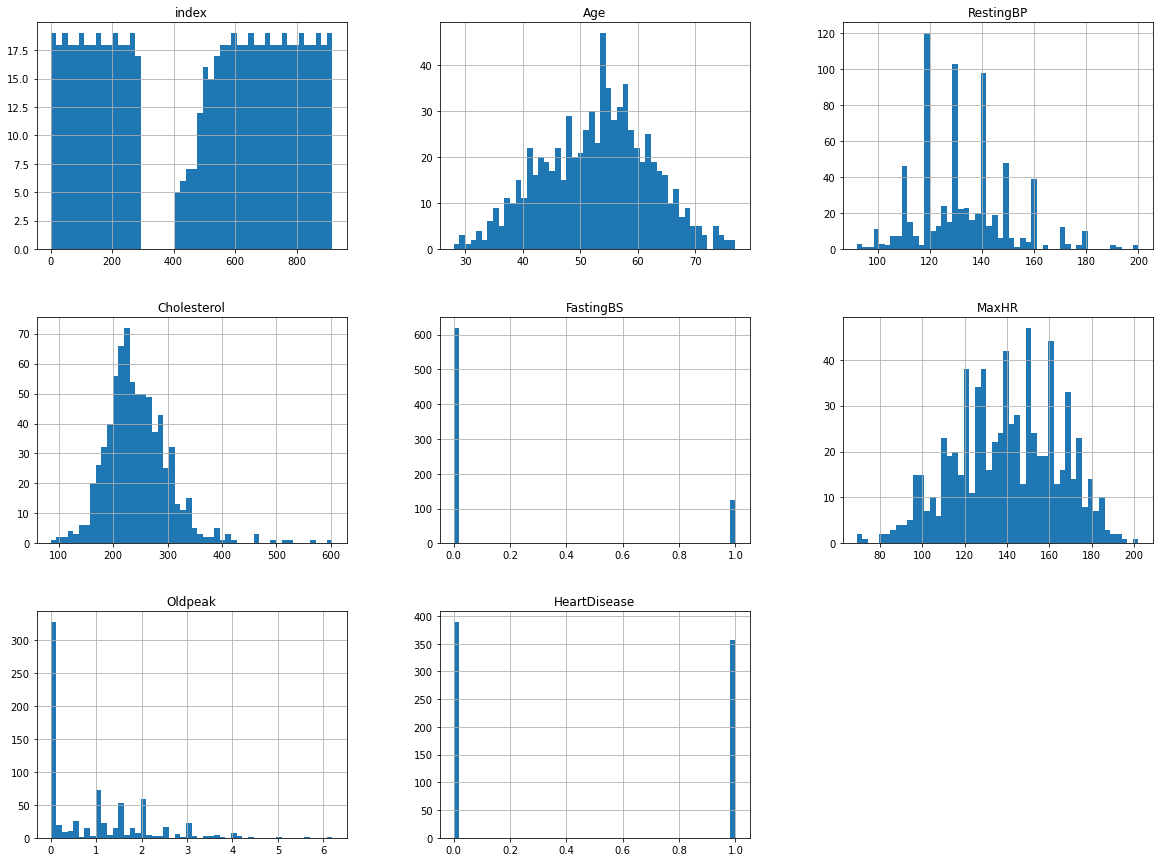

In [22]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

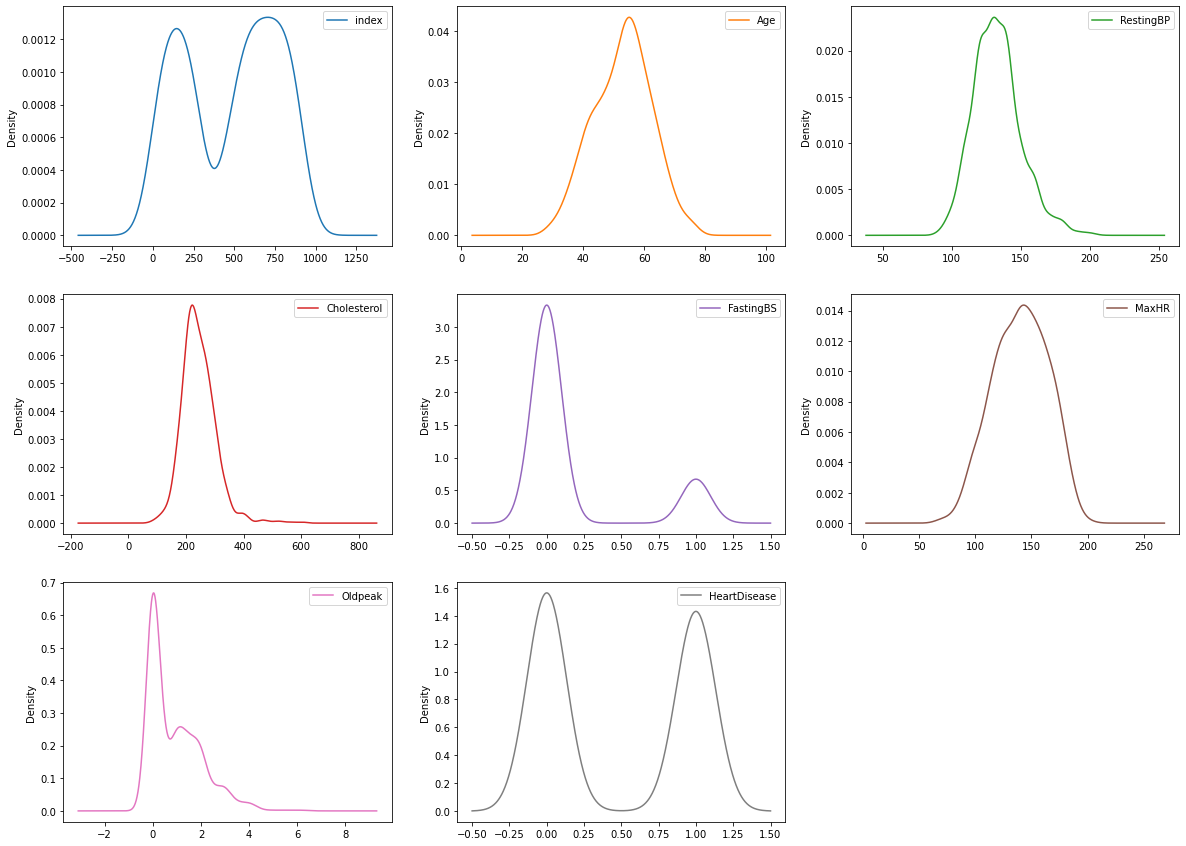

In [23]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

<AxesSubplot:title={'center':'Gender Comparison'}, ylabel='Sex'>

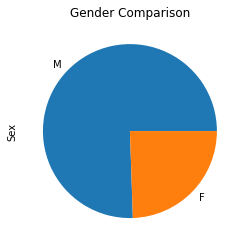

In [36]:
df["Sex"].value_counts().plot(kind="pie", title="Gender Comparison")

<AxesSubplot:>

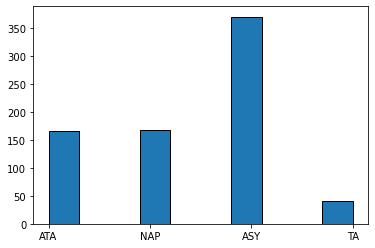

In [25]:
df["ChestPainType"].hist(grid=False, edgecolor='black')

<AxesSubplot:>

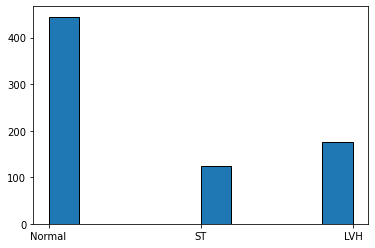

In [26]:
df["RestingECG"].hist(grid=False, edgecolor='black')

<AxesSubplot:>

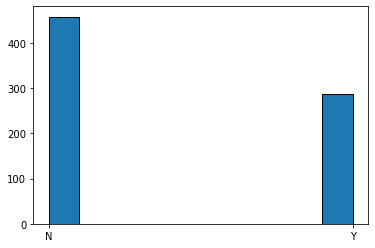

In [27]:
df["ExerciseAngina"].hist(grid=False, edgecolor='black')

<AxesSubplot:>

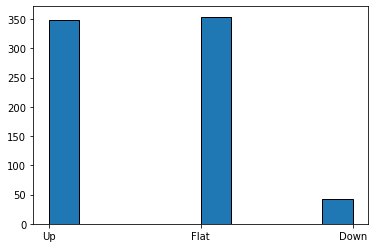

In [28]:
df["ST_Slope"].hist(grid=False, edgecolor='black')

# 4. Outliers

index              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
RestingBP       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Cholesterol        AxesSubplot(0.125,0.391471;0.227941x0.222059)
FastingBS       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
MaxHR           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Oldpeak               AxesSubplot(0.125,0.125;0.227941x0.222059)
HeartDisease       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

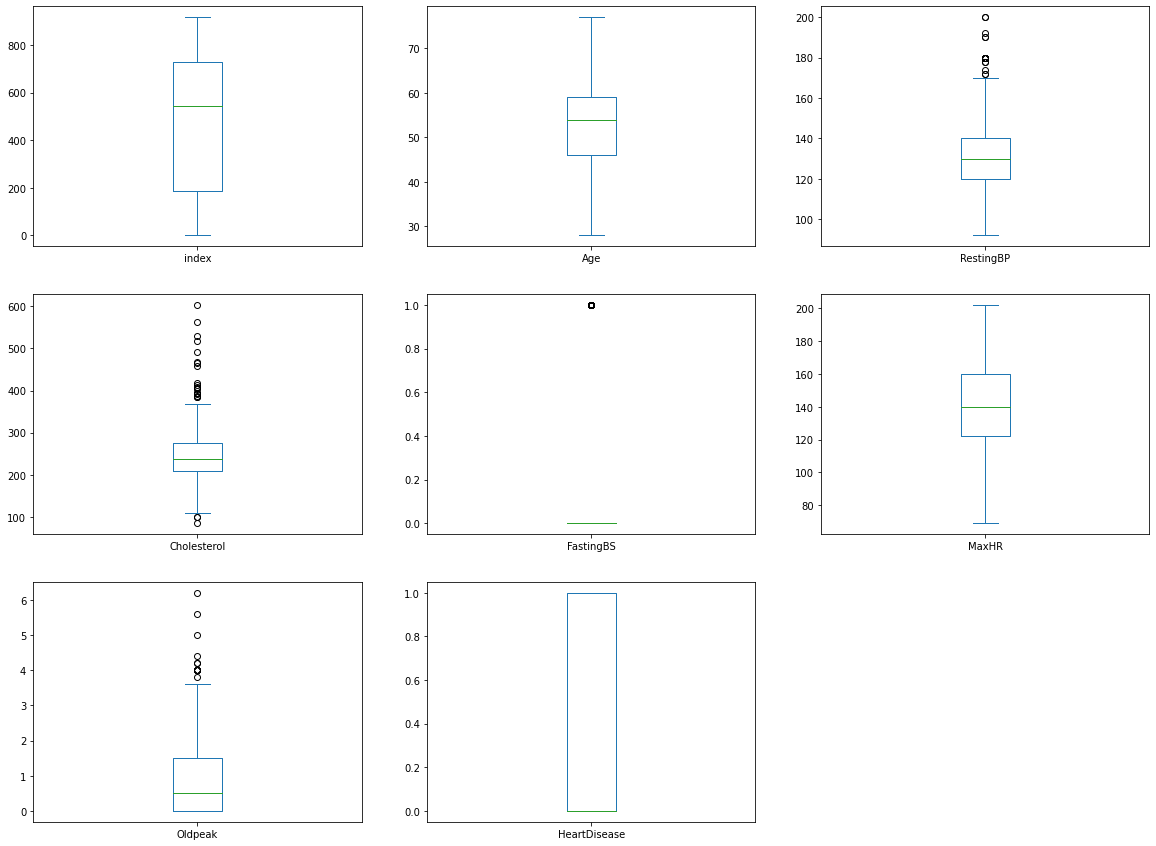

In [29]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

# 5. Correlation

In [30]:
corr = df.corr(method='pearson')
corr

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
index,1.000000,0.339182,0.005836,-0.010960,0.112424,0.154943,0.199881,0.112698
Age,0.339182,1.000000,0.259074,0.055390,0.240810,-0.381774,0.284489,0.297092
RestingBP,0.005836,0.259074,1.000000,0.094986,0.173478,-0.125419,0.198008,0.172642
Cholesterol,-0.010960,0.055390,0.094986,1.000000,0.053239,-0.018895,0.056824,0.102251
FastingBS,0.112424,0.240810,0.173478,0.053239,1.000000,-0.102428,0.055045,0.160138
MaxHR,0.154943,-0.381774,-0.125419,-0.018895,-0.102428,1.000000,-0.259078,-0.376843
Oldpeak,0.199881,0.284489,0.198008,0.056824,0.055045,-0.259078,1.000000,0.495091
HeartDisease,0.112698,0.297092,0.172642,0.102251,0.160138,-0.376843,0.495091,1.000000


<AxesSubplot:>

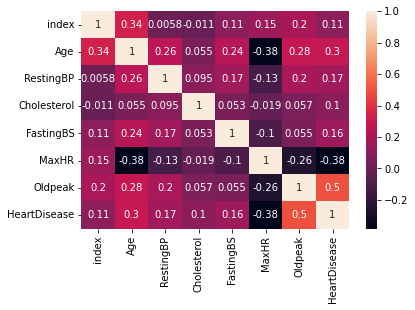

In [31]:
sns.heatmap(corr, annot = True)

### Notes to take
* Oldpeak has the strongest correlation to HeartDisease, hence people with high oldpeak level needs to be wary of getting a heart disease
* MaxHR has a negative correlation to HeartDisease, which means that the lower maximum heart rate someone has, the higher the risk of getting heart disease they have